# Introduction to Computer Vision by Georgia Tech
Course notes and challenges recreated for Python OpenCV

In [1]:
import numpy as np
import cv2
from matplotlib import  pyplot as plt
%matplotlib inline

## Lesson 2

In [2]:
#load an image
img_data = cv2.imread('bride_large.jpg', cv2.IMREAD_GRAYSCALE)


In [3]:
#get image size
height, width = img_data.shape
print(f'This image is {height} x {width} pixels')


This image is 2405 x 3000 pixels


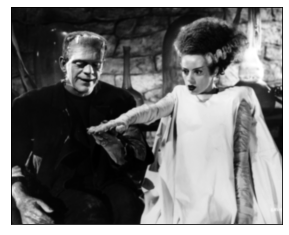

In [4]:
# display with matplotlib
plt.imshow(img_data, cmap='gray', interpolation='bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


In [5]:
#get pixel values
middle_pixel = img_data[height // 2, width // 2]
print(f'The middle pixel has a value of {middle_pixel}, or {middle_pixel * 100 // 255}% white')


The middle pixel has a value of 113, or 44% white


### Select, display region

In [6]:
region_size = 700
half_region = region_size // 2
cols = width // 2 - half_region, width // 2 + half_region
rows = height // 2 - half_region, height // 2 + half_region
middle_region = img_data[cols[0]:cols[1], rows[0]:rows[1]]


In [7]:
#display image
cv2.imshow('Central Region', middle_region)
cv2.waitKey(0)
cv2.destroyAllWindows()


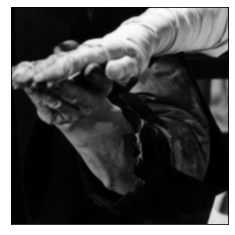

In [8]:
# display with matplotlib
plt.imshow(middle_region, cmap='gray', interpolation='bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


In [9]:
#load color image, display individual color plane
color_data = cv2.imread('bof_colorized_big.jpg', cv2.IMREAD_COLOR)

#display image
cv2.imshow('Red Channel', color_data[:, :, 0])
cv2.waitKey(0)
cv2.destroyAllWindows()


### Add, subtract, and blend images

In [10]:
#load an image
img_data = cv2.imread('bride_large.jpg', cv2.IMREAD_GRAYSCALE)
height, width = img_data.shape

#divide into images of equal size
img_1 = img_data[:, width // 2:]
img_2 = img_data[:, :width // 2]

#add two images,save result
composite_add = img_1 + img_2
cv2.imwrite('addition.png', composite_add)

#subtract one image from another
composite_subtract = img_1 - img_2
cv2.imwrite('subtraction.png', composite_subtract)

#average two images by adding half from each
#imga/2 + imgb/2
composite_avg = img_1 / 2 + img_2 / 2 
_ = cv2.imwrite('average.png', composite_avg)


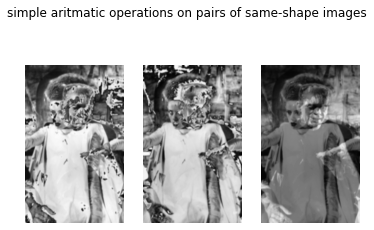

In [11]:
# display with matplotlib
fig, (sp1, sp2, sp3) = plt.subplots(1, 3)
fig.suptitle('simple aritmatic operations on pairs of same-shape images')
sp1.imshow(composite_add, cmap='gray', interpolation='bicubic')
sp2.imshow(composite_subtract, cmap='gray', interpolation='bicubic')
sp3.imshow(composite_avg, cmap='gray', interpolation='bicubic')
_ = [ax.set_axis_off() for ax in [sp1, sp2, sp3]]


### Add noise

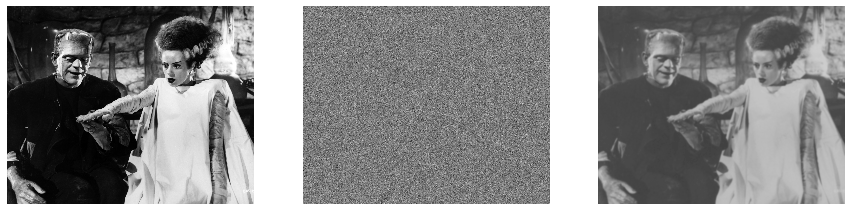

In [12]:
#load demo photo
img_data = cv2.imread('bride_large.jpg', cv2.IMREAD_GRAYSCALE)

#generate array of gaussian noise in range 0 to 255, equal size to demo photo
noise = np.random.normal(size=img_data.shape) #mean 0, std 1
noise = noise + np.full(img_data.shape, abs(noise.min())) #shift noise to positive values
scale_coeff = 255 / noise.max() #determine scale coeff
noise *= scale_coeff #scale noise to range of 8-bit uint values, 0 to 255

#add noise to photo
noisy = img_data + noise
cv2.imwrite('noisy_bride.png', noisy)

# display with matplotlib

fig, (sp1, sp2, sp3) = plt.subplots(1, 3, figsize=[15, 10])
sp1.imshow(img_data, cmap='gray')
sp2.imshow(noise, cmap='gray')
sp3.imshow(noisy, cmap='gray', interpolation='bicubic')
_ = [ax.set_axis_off() for ax in [sp1, sp2, sp3]]


## Lesson 3

### Removing Noise
##### 1D

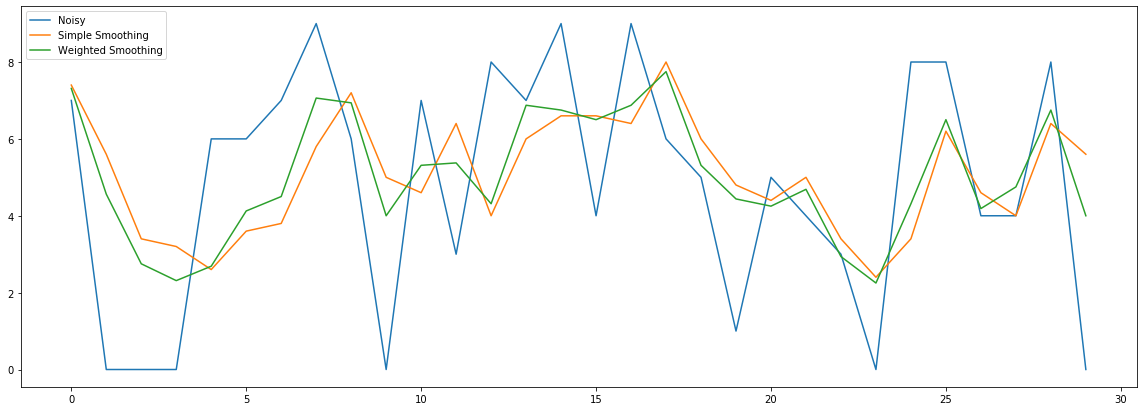

In [13]:
#noisy values
values = np.random.randint(0, 10, 34)

#uniform moving average to smooth noise, weights 0111110 
simple_ma = [value for value in values[:2]]
for idx, value in enumerate(values[2:-2]):
    simple_ma.append((values[idx - 2] + values[idx - 1] + value + values[idx + 1] + values[idx + 1])/5)
    
_ = [simple_ma.append(value) for value in values[-2:]]
        
#weighted moving average to smooth noise, weights 0146410
weighted_ma = [value for value in values[:2]]
for idx, value in enumerate(values[2:-2]):
    weighted_ma.append((values[idx - 2] + (values[idx - 1] * 4) + (value * 6) + (values[idx + 1] * 4) + values[idx + 1])/16)
    
_ = [weighted_ma.append(value) for value in values[-2:]]

#trim equivalent ends
values = values[2:-2]
simple_ma = simple_ma[2:-2]
weighted_ma = weighted_ma[2:-2]

plt.figure(figsize=[20, 7])
_ = plt.plot(range(values.size), values, label='Noisy')
_ = plt.plot(range(values.size), simple_ma, label='Simple Smoothing')
_ = plt.plot(range(values.size), weighted_ma, label='Weighted Smoothing')
_ = plt.legend(loc=2)

plt.savefig('smoothing.png')

##### 2D

In [14]:
def local_simple_avg(array, center):
    result = 0
    row, col = center
    #return value for weighted average around center
    #ne, n, nw, w, center, sw, s, se, e of center
    location_values = np.array([
                array[row - 1, col - 1],
                array[row - 1, col],
                array[row - 1, col + 1],
                array[row, col - 1],
                array[row, col],
                array[row, col + 1],
                array[row + 1, col -1 ],
                array[row + 1, col],
                array[row + 1, col + 1]])
    return location_values.sum() / 9

def local_weighted_avg(array, center):
    result = 0
    row, col = center
    #return value for weighted average around center
    #ne, n, nw, w, center, sw, s, se, e of center
    location_values = np.array([
                array[row - 1, col - 1] * 4,
                array[row - 1, col] * 4,
                array[row - 1, col + 1] * 4,
                array[row, col - 1] * 4,
                array[row, col] * 6,
                array[row, col + 1] * 4,
                array[row + 1, col -1 ] * 4,
                array[row + 1, col] * 4,
                array[row + 1, col + 1] * 4])
    
    return location_values.sum() / 38
    

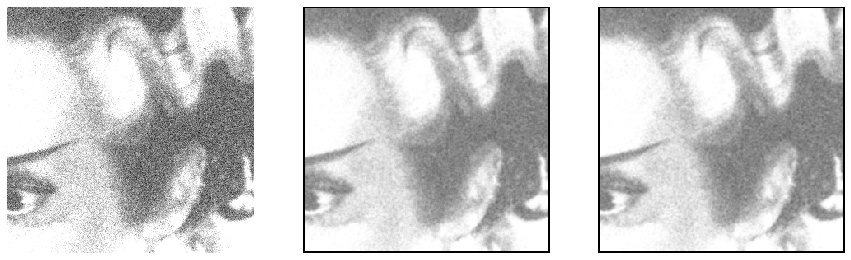

In [15]:
img_data = cv2.imread('noisy_bride.png', cv2.IMREAD_GRAYSCALE)

region_size = 300
center = [650, 2200]
half_region = region_size // 2
cols = center[0] - half_region, center[0] + half_region
rows = center[1] - half_region, center[1] + half_region

face = img_data[cols[0]:cols[1], rows[0]:rows[1]]

smoothed_data_simple = np.zeros_like(face)
smoothed_data_weighted = np.zeros_like(face)

rows, columns = face.shape

for row in range(rows):
    for col in range(columns):
        if row > 2 and col > 2 and row < rows - 2 and col < columns - 2:
            smoothed_data_simple[row, col] = local_simple_avg(face, [row, col])
            
for row in range(rows):
    for col in range(columns):
        if row > 2 and col > 2 and row < rows - 2 and col < columns - 2:
            smoothed_data_weighted[row, col] = local_weighted_avg(face, [row, col])
        
fig, (sp1, sp2, sp3) = plt.subplots(1, 3, figsize=[15, 10])
sp1.imshow(face, cmap='gray')
sp2.imshow(smoothed_data_simple, cmap='gray')
sp3.imshow(smoothed_data_weighted, cmap='gray')

_ = [ax.set_axis_off() for ax in [sp1, sp2, sp3]]
plt.savefig('smoothing_2d.png')
